In [1]:
import model
import dataset
import trainner
import model

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [3]:

spread_times = 3
embedded_depth = 2  # at least 1
vector_size = 8
embedding_size = 64
batch_size = 64

In [4]:
train_dataset = "data/training"
test_dataset = "data/test"
output_path = "output/parameter.model"

In [5]:
data = dataset.GraphDataset(train_dataset)

In [6]:
print("Creating Dataset")
train_dataset = dataset.GraphDataset(train_dataset)
test_dataset = dataset.GraphDataset(test_dataset) if test_dataset is not None else None

Creating Dataset


In [7]:
print("Creating Dataloader")
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0, collate_fn=dataset.custom_collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=10, collate_fn=dataset.custom_collate_fn, shuffle=True) \
    if test_dataset is not None else None

Creating Dataloader


In [8]:
print("Building model")
try:
    model = model.GraphEmbeddingNetwork(spread_times, embedded_depth, vector_size, embedding_size)
    print("Model built successfully")
except Exception as e:
    print("Error occurred while building the model:", str(e))


Building model
Model built successfully


In [9]:
print("Creating Trainer")
train_model = trainner.Trainer(model, train_data_loader, test_data_loader)

Creating Trainer
CUDA available: True
Total Parameters: 13056


In [10]:
loss_figure = []
print("Training Start")
epochs = 30
for epoch in range(epochs):
    epoch_loss = train_model.train(epoch, batch_size)
    loss_figure.append(sum(epoch_loss) / len(epoch_loss))
    train_model.save(epoch, output_path)

Training Start


EP_train:0: 100%|| 3/3 [00:00<00:00, 10.24it/s, epoch=0, iter=2, loss:=1.58]


EP:0 Model Saved on: output/parameter.model.ep0


EP_train:1: 100%|| 3/3 [00:00<00:00, 19.23it/s, epoch=1, iter=2, loss:=1.83]


EP:1 Model Saved on: output/parameter.model.ep1


EP_train:2: 100%|| 3/3 [00:00<00:00, 18.00it/s, epoch=2, iter=2, loss:=2.08]


EP:2 Model Saved on: output/parameter.model.ep2


EP_train:3: 100%|| 3/3 [00:00<00:00, 19.56it/s, epoch=3, iter=2, loss:=1.75]


EP:3 Model Saved on: output/parameter.model.ep3


EP_train:4: 100%|| 3/3 [00:00<00:00, 21.23it/s, epoch=4, iter=2, loss:=2.27]


EP:4 Model Saved on: output/parameter.model.ep4


EP_train:5: 100%|| 3/3 [00:00<00:00, 18.12it/s, epoch=5, iter=2, loss:=1.98]


EP:5 Model Saved on: output/parameter.model.ep5


EP_train:6: 100%|| 3/3 [00:00<00:00, 20.60it/s, epoch=6, iter=2, loss:=1.88]


EP:6 Model Saved on: output/parameter.model.ep6


EP_train:7: 100%|| 3/3 [00:00<00:00, 19.51it/s, epoch=7, iter=2, loss:=1.43]


EP:7 Model Saved on: output/parameter.model.ep7


EP_train:8: 100%|| 3/3 [00:00<00:00, 16.79it/s, epoch=8, iter=2, loss:=1.8] 


EP:8 Model Saved on: output/parameter.model.ep8


EP_train:9: 100%|| 3/3 [00:00<00:00, 19.55it/s, epoch=9, iter=2, loss:=1.87]

EP:9 Model Saved on: output/parameter.model.ep9


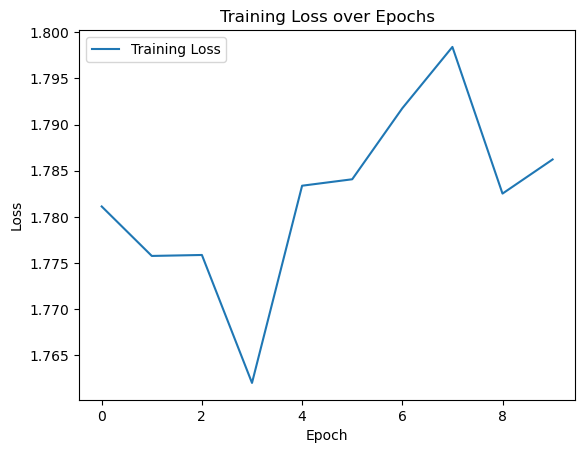

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(epochs), loss_figure, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [10]:
train_model.load("output/parameter.model.ep4")
for epoch in range(1):
    train_model.test(epoch, batch_size)

FileNotFoundError: No model found at output/parameter.model.ep4